## Task 1

In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Read data and store in separate dataframes
df_eng = pd.read_excel('Data/riket2023_åk9_np.xlsx', sheet_name='Engelska', header=8)
df_swe = pd.read_excel('Data/riket2023_åk9_np.xlsx', sheet_name='Svenska', header=8)
df_swe_sec = pd.read_excel('Data/riket2023_åk9_np.xlsx', sheet_name='Svenska som andraspråk', header=8)
df_math = pd.read_excel('Data/riket2023_åk9_np.xlsx', sheet_name='Matematik', header=8)

df_list = [df_eng, df_swe, df_swe_sec, df_math]

In [5]:
# Rename columns

for df in df_list:
    df.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)', 'Flickor (poäng)', 'Pojkar (poäng)']
    df["Totalt (poäng)"] = df["Totalt (poäng)"].replace("..", "0")  # Replace ".." with "0"
    df["Totalt (poäng)"] = pd.to_numeric(df["Totalt (poäng)"], errors="coerce")  # Convert to number

# Plotting the data
df_list[0]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


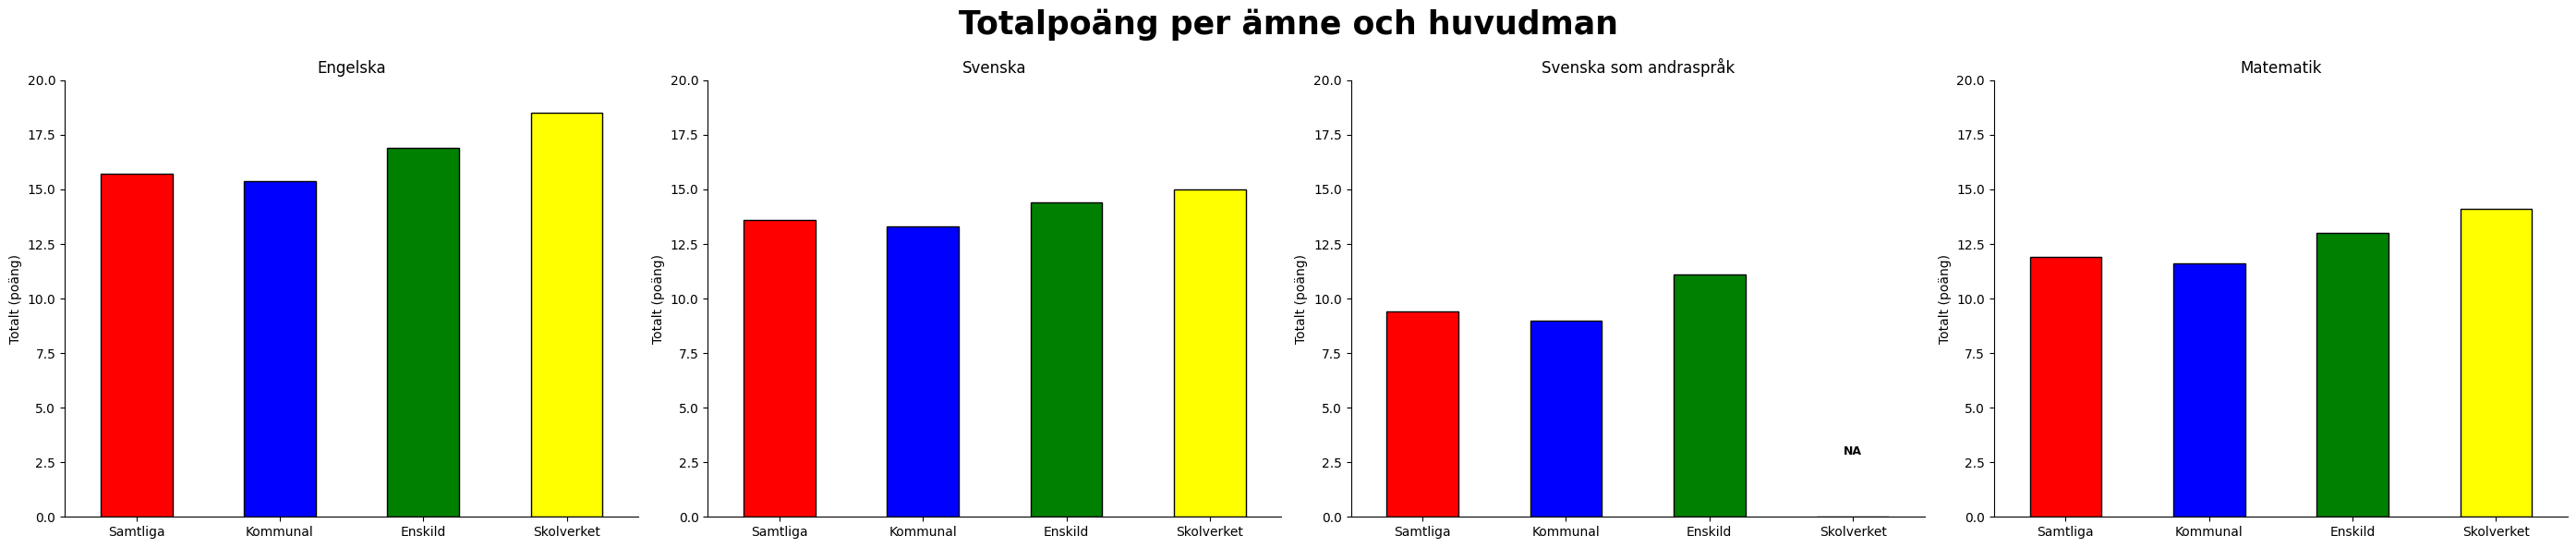

In [6]:
# Create a list with the titles for each subject
subject_titles = ["Engelska", "Svenska", "Svenska som andraspråk", "Matematik"]

# Create a figure with 4 subplots (one for each subject)
fig, axes = plt.subplots(1, 4, figsize=(len(df_list)*7, 6))

# Loop through the dataframes and plot the data in each subplot
for i, df in enumerate(df_list):
    df.plot(
        x='Huvudman', 
        y='Totalt (poäng)', 
        kind='bar', 
        ax=axes[i], 
        legend=False,  # Hide legend
        color=['red', 'blue', 'green', 'yellow'],  # Set color of the bars
        edgecolor='black'  # Set color of the edge of the bars
    )
    
    axes[i].set_title(subject_titles[i]) 
    axes[i].set_ylabel("Totalt (poäng)")  
    axes[i].set_xlabel("")
    axes[i].set_ylim(0,20)  # Set the y-axis limits
    axes[i].spines[['top', 'right']].set_visible(False)  # Hide the top and right border
    axes[i].tick_params(axis='x', rotation=0) # Rotate x-axis labels

fig.suptitle("Totalpoäng per ämne och huvudman", fontsize=25, fontweight = 'bold')


axes[2].annotate('NA',
                xy=(1, 2),
                xytext=(3, 3),
                fontsize=9, fontweight='bold', color='black',
                rotation=0, ha='center', va='center') 

fig.tight_layout()  # Adjust the layout

# Save the figure   
fig.savefig("visualisation/totalpoints_Sub_och_huvudman.png", dpi=300, bbox_inches='tight')


## Task 2

In [ ]:
# Read the data from the relevant sheet (Tabell 1B) in the XLSX file and store in a dataframe
df_table_1b = pd.read_excel('data/betyg_o_prov_riksnivå.xlsx', sheet_name='Tabell 1B', header=7)

# Rename the first column to "År"
df_table_1b = df_table_1b.rename(columns={"Unnamed: 0": "År"})

# Filte of the rows I need (0-4)
df_table_1b = df_table_1b.loc[0:4]

# Filter out the columns I need (0, 7, 8, 9)
df_missing_grades = df_table_1b.iloc[:, [0, 7, 8, 9]]

# Rename the columns
df_missing_grades = df_missing_grades.rename(columns={"Totalt.2": "Totalt",
                                                    "Flickor.2": "Flickor",
                                                    "Pojkar.2": "Pojkar"}
                                                    )

df_missing_grades # Print the dataframe

,År,Totalt,Flickor,Pojkar
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5
4,2022/23,26.8,25.5,28.0


In [ ]:
# Create a line plot showing the percentage of students missing grades in at least one subject
fig_missing_grades = px.line(
    df_missing_grades,
    x='År',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Andel som saknar betyg i minst ett ämne',
    labels={'År': 'Årtal', 'value': 'Andel (%)', 'variable': 'Kategori'},
)

fig_missing_grades.show()

# Save the plot as a html file
fig_missing_grades.write_html("visualisation/Missing_grades.html")

In [ ]:
# Read the data from the relevant sheet (Tabell 1B) in the XLSX file and store in a dataframe
df_merit_16 = df_table_1b.iloc[:, :4] # Select the columns with the merit values for 16 subjects

# Fig object to use with plotly express to create a line diagram
fig_merit_16 = px.line(
    df_merit_16,
    x='År',
    y=['Flickor', 'Pojkar', 'Totalt'],
    title='Meritvärde per kategori och år (16 ämnen)',
    labels={'År': 'Årtal', 'value': 'Poäng i meritvärde', 'variable': 'Kategori'},
)

fig_merit_16.show()

# Save the plot as a html file
fig_merit_16.write_html("visualisation/Merit_Value.html")